# Experiments

## Utility Code

In [2]:
# Utility Code
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np

import warnings
warnings.filterwarnings('ignore')   # Some values are NaN, so long warnings are printed as a result.

# Check palettes here: https://www.practicalpythonfordatascience.com/ap_seaborn_palette

geographical_palette = sns.color_palette("terrain", 8)
orbital_palette = sns.color_palette("Dark2", 8)
# equatorial_palette = sns.color_palette("cool_r")
latitudinal_cases = sns.color_palette("tab10", 8)
# transorbital_palette = sns.color_palette("inferno_r")


geographical_cases = {
    "Landlocked": geographical_palette,
    "Coastal": geographical_palette,
}

orbital_cases = {
    "IntraOrbital": orbital_palette,
    "TransOrbital": orbital_palette,
}    

latitudinal_cases = {
    "Polar": latitudinal_cases,
    "Equatorial": latitudinal_cases,
}

directions = ["East", "West", "North", "South"]


def load_data(path: str):
    """Load CSV data."""
    if not os.path.isfile(path):
        raise Exception(f"The path {path} does not exist.")
    return pd.read_csv(path)

def load_json_data(path: str):
    """Load JSON data."""
    if not os.path.isfile(path):
        raise Exception(f"The path {path} does not exist.")
    with open(path) as file:
        data = json.load(file)
    return pd.DataFrame(data['latencies'])

def graph(plot_fn, ax, cases, imax=1):
    """Plot the median route latency for each case and direction across frames.

    To enable RDiS, set imax to a value greater than 1.
    """
    defence = ""
    if imax != 1:
        defence = f"{imax}"
    else:
        defence = "OFF"
    palette_idx = 0
    for case, palette in cases.items():
        print(palette_idx)
        for idx, direction in enumerate(directions):
            exists = plot_fn(case, direction, defence, palette, palette_idx, ax)
            # TODO: ONLY INCREASE IF THE LINE WAS USED!!!!
            if True:
                palette_idx += 1

## 1. Network Performance relative to $i_\text{max}$
Plots the network performance relative to $i_\text{max}$ for $i_\text{max} \in \{3, 6, 9\}$.

In [3]:
def plot_median_latency(case, direction, defence, palette, idx, ax):
    if defence == "OFF":
        filename = f"{case}_{direction}_{defence}_000"
        data = load_json_data(f"Logs/Captures/{filename}/rtt.json")
        data["median"] = data["rtt"].dropna().apply(np.median)
    else:
        # average the median of 20 runs.
        # TODO: COMPLETELY UNSURE IF THIS WORKS. NEED TO TEST TOMORROW.
        for i in range(1, 20): # ran 20 instances.
            filename = f"{case}_{direction}_{defence}_{i:03d}"
            if i == 1:
                data = load_json_data(f"Logs/Captures/{filename}/rtt.json")
            else:
                temp_data = load_json_data(f"Logs/Captures/{filename}/rtt.json")
                temp_data["median"] = temp_data["rtt"].dropna().apply(np.median)
                data["median"] = data["median"] + temp_data["median"]
        data["median"] = data["median"] / 20
    line = sns.lineplot(
        data=data,
        x="frame",
        y="median",
        color=palette[idx],
        label=f"{case}_{direction}" if data["median"].notna().any() else "__nolegend__",
        ax=ax,
    )
    return True if data["median"].notna().any() else False
    

def show_plot(fig, axs):
    for ax in np.ravel(axs):  # Flatten the array of Axes objects
        ax.set_xlabel("Snapshot")
        ax.set_ylabel("Median Latency (ms)")
        ax.tick_params(axis="y", labelcolor="black")
        ax.grid(True)

        # Remove the subplot if there are no lines.
        if len(ax.get_lines()) == 0:
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

### Geographical

0


Exception: The path Logs/Captures/Landlocked_East_OFF_000/rtt.json does not exist.

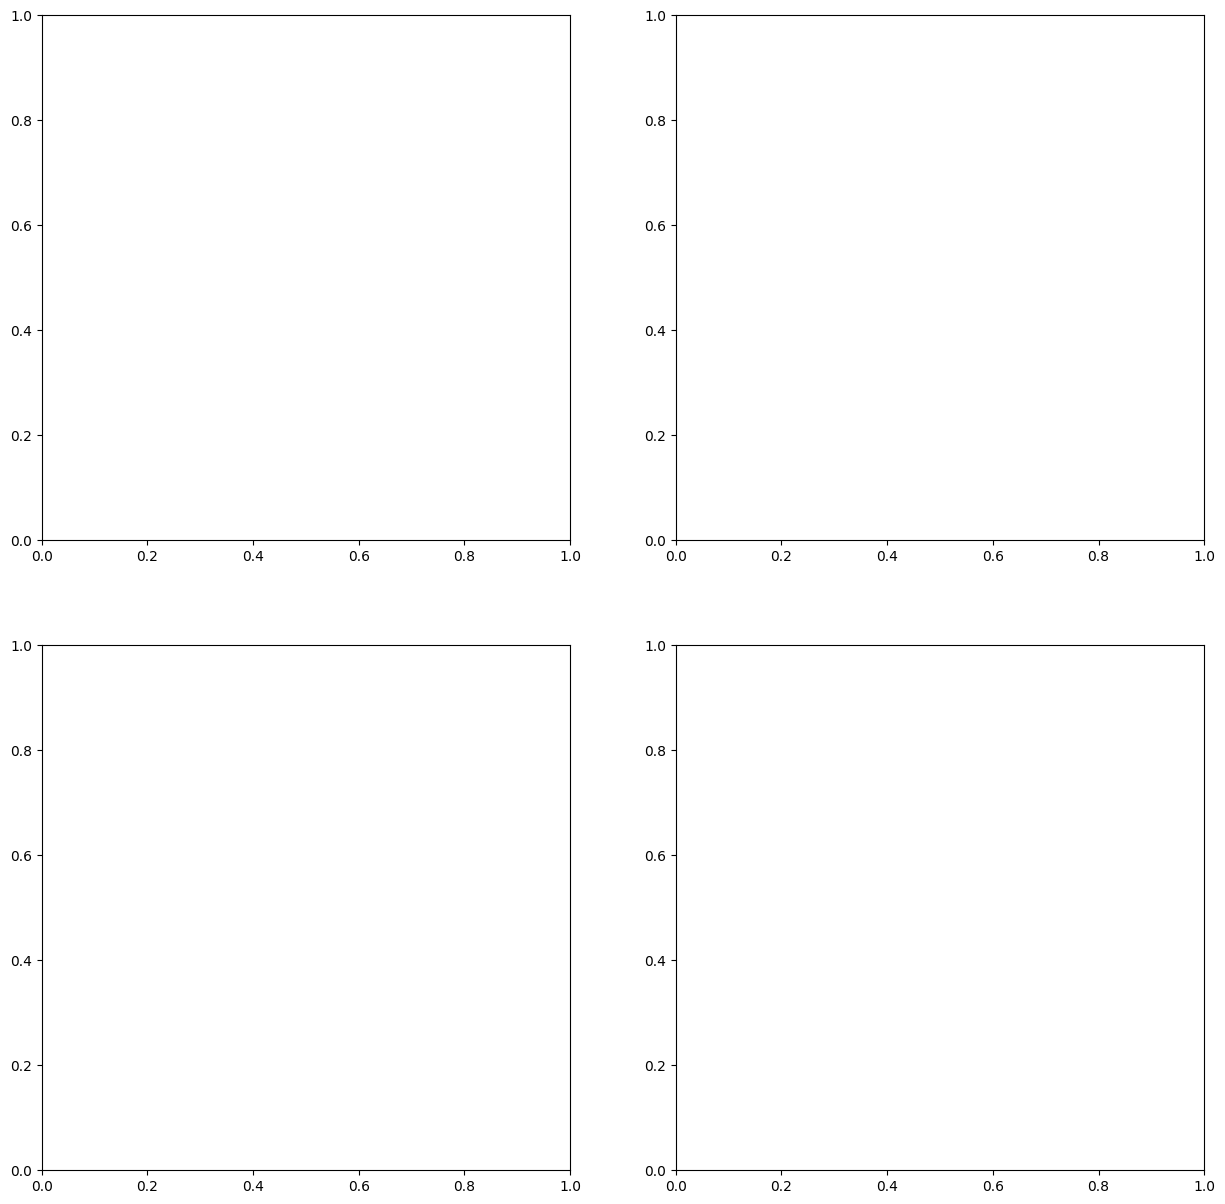

In [5]:
# Geographical
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Defence disabled
graph(plot_median_latency, axs[0, 0], geographical_cases)

# imax = 3
graph(plot_median_latency, axs[1, 0], geographical_cases, imax=3)

# # imax = 6
# graph(plot_median_latency, axs[2, 0], geographical_cases, imax=6)

# # imax = 9
# graph(plot_median_latency, axs[3, 0], geographical_cases, imax=9)

show_plot(fig, axs)

### Latitudinal

0
4


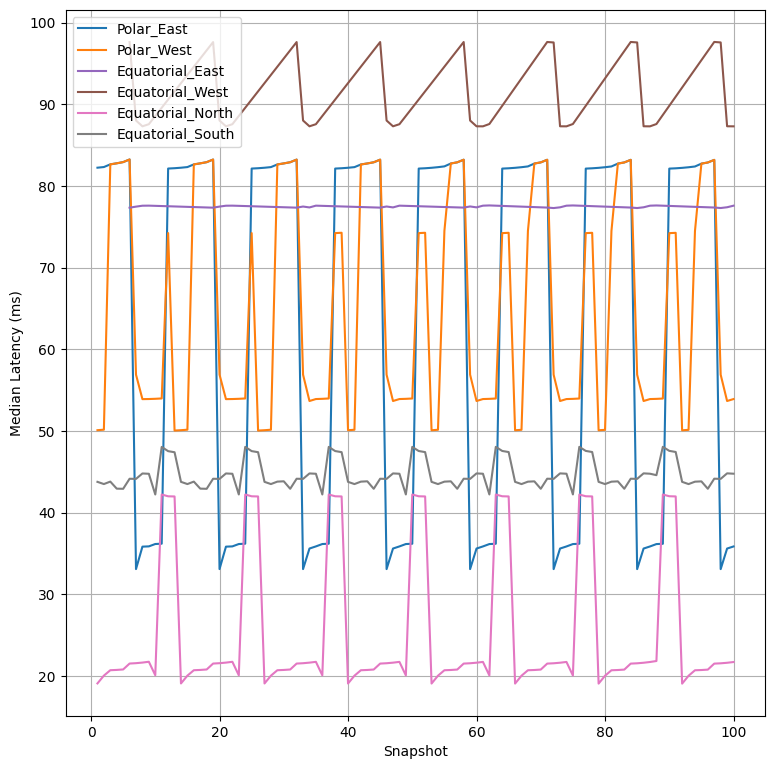

In [ ]:
# Latitudinal
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Defence disabled
graph(plot_median_latency, axs[0, 0], latitudinal_cases)

# imax = 3
# graph(plot_median_latency, axs[1, 0], latitudinal_cases, imax=3)

# # imax = 6
# graph(plot_median_latency, axs[2, 0], latitudinal_cases, imax=6)

# # imax = 9
# graph(plot_median_latency, axs[3, 0], latitudinal_cases, imax=9)

show_plot(fig, axs)

### Orbital

0
4


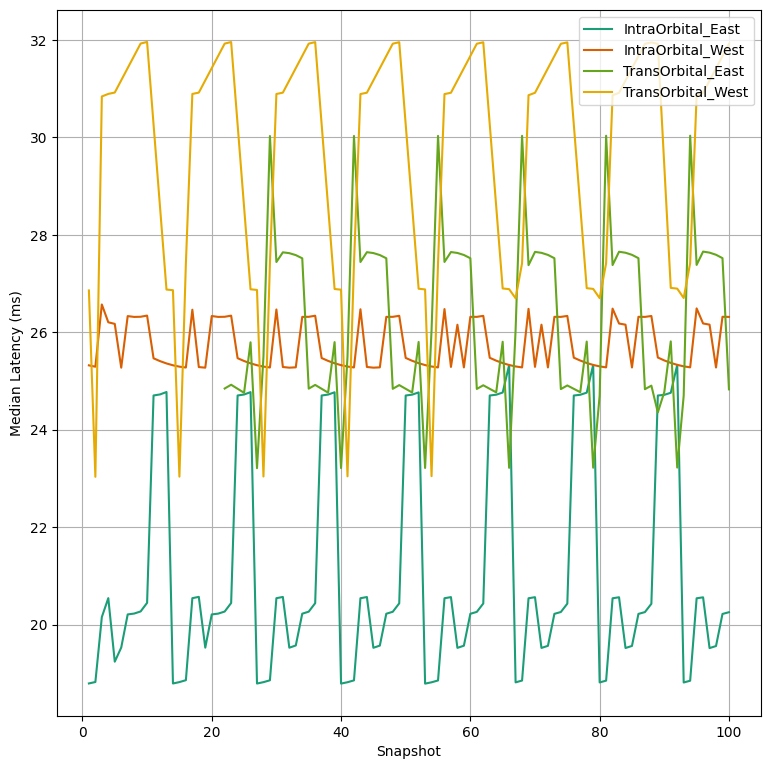

In [ ]:
# Orbital
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Defence disabled
graph(plot_median_latency, axs[0, 0], orbital_cases)

# # imax = 3
# graph(plot_median_latency, axs[1, 0], orbital_cases, imax=3)

# # imax = 6
# graph(plot_median_latency, axs[2, 0], orbital_cases, imax=6)

# # imax = 9
# graph(plot_median_latency, axs[3, 0], orbital_cases, imax=9)

show_plot(fig, axs)

## 2. Simulated Probability of Congestion relative to $i_\text{max}$
Plot the probability of congestion relative to $i_\text{max}$ using spare capacity data retrieved from the simulator for $i_\text{max} \in \{3, 6, 9\}$..

0


TypeError: plot_probability_congestion() takes 5 positional arguments but 6 were given

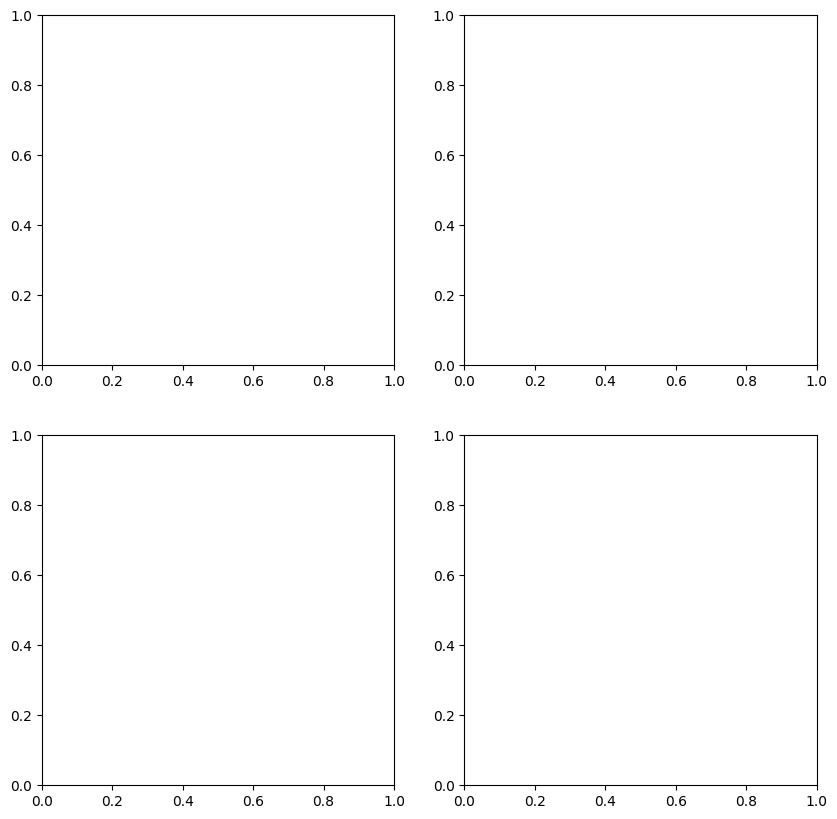

In [ ]:
def plot_probability_congestion(case, direction, defence, palette, idx):
    filename = f"{case}_{direction}_{defence}"
    data = load_data(f"{filename}/{filename}.csv")
    successes = data["FINAL CAPACITY"].value_counts()[0]
    probability = successes / len(data)
    sns.barplot(
        x="{case} {direction}",
        y=probability,
        color=palette[idx],
        ax=ax,
        label="{case} {direction}",
    )

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Defence disabled
graph(plot_probability_congestion, axs[0], geographical_cases)

# imax = 3
# graph(plot_probability_congestion, ax=axs[1], imax=3)

# # imax = 6
# graph(plot_probability_congestion, ax=axs[2], imax=6)

# # imax = 9
# graph(plot_probability_congestion, ax=axs[3], imax=9)


for ax in axs:
    # ax.set_xlabel("Snapshot")
    ax.set_ylabel("Probability of Congestion")
    # ax.set_ylim(-.5, 20.5)  # TODO: CHANGE THIS.
    # ax.tick_params(axis="y", labelcolor="black")
    ax.grid(True)

    # Remove the subplot if there is no data.
    if len(ax.get_lines()) == 0:
        fig.delaxes(ax)

plt.tight_layout()
plt.legend()
plt.show()

## 3. Simulated Expected Malicious Traffic relative to $i_\text{max}$

In [ ]:
def plot_expected_capacity(case, direction, defence, palette, idx):
    filename = f"{case}_{direction}_{defence}"
    data = load_data(f"{filename}/{filename}.csv")
    plot_data = pd.DataFrame(
        {
            "case direction": [f"{case} {direction}"],
            "mean": data.mean()["FINAL CAPACITY"],
            "stddev": data.std()["FINAL CAPACITY"],
        }
    )

    sns.barplot(
        x="case direction",
        y="mean",
        yerr="stddev",
        data=plot_data,
        color=palette[idx],
        ax=ax,
        label="{case} {direction}",
    )


fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Defence disabled
graph(plot_expected_capacity, axs[0], geographical_cases)

# # imax = 3
# graph(plot_expected_capacity, ax=axs[1], imax=3)

# # imax = 6
# graph(plot_expected_capacity, ax=axs[2], imax=6)

# # imax = 9
# graph(plot_expected_capacity, ax=axs[3], imax=9)


for ax in axs:
    # ax.set_xlabel("Snapshot")
    ax.set_ylabel("Expected Spare Capacity")
    # ax.set_ylim(-.5, 20.5)  # TODO: CHANGE THIS.
    # ax.tick_params(axis="y", labelcolor="black")
    ax.grid(True)

    # Remove the subplot if there is no data.
    if len(ax.get_lines()) == 0:
        fig.delaxes(ax)

plt.tight_layout()
plt.legend()
plt.show()